# Experiment 5: Watts-Strogatz (WS) Small-World Network Model

**Aim**: Implementation of Watts-Strogatz model random network growth model and analysis.

**Theory**:
The Watts-Strogatz model interpolates between a regular lattice and a random graph.
- **Regular Lattice (p=0)**: High clustering, High path length.
- **Small World (0 < p < 1)**: High clustering, Low path length.
- **Random Graph (p=1)**: Low clustering, Low path length.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def analyze_ws_graph(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p, seed=42)
    
    # Clustering
    avg_clustering = nx.average_clustering(G)
    
    # Path Length
    if nx.is_connected(G):
        avg_path_len = nx.average_shortest_path_length(G)
    else:
        avg_path_len = float('inf')
        
    return {
        "p": p,
        "Clusters": avg_clustering,
        "Path Length": avg_path_len
    }


In [3]:
# Experimenting with varying p
N = 100
K = 4 # Each node connected to 4 nearest neighbors
probs = [0, 0.01, 0.05, 0.1, 0.5, 1.0]

results = []
for p in probs:
    results.append(analyze_ws_graph(N, K, p))

df = pd.DataFrame(results)
print("Analysis of WS Model with varying Probability p:")
print(df)


Analysis of WS Model with varying Probability p:
      p  Clusters  Path Length
0  0.00  0.500000    12.878788
1  0.01  0.478667     7.438182
2  0.05  0.443333     6.891919
3  0.10  0.383000     4.906465
4  0.50  0.097000     3.634747
5  1.00  0.022508     3.423434


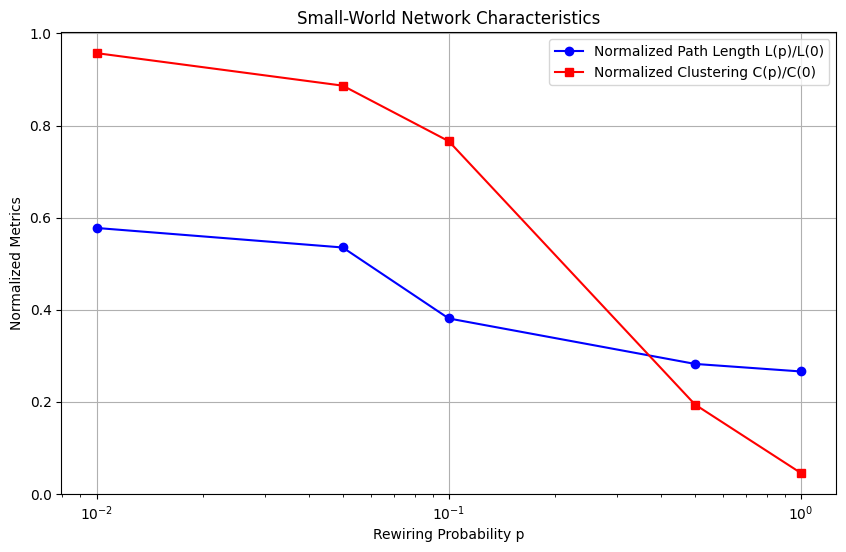

In [4]:
# Visualizing the Small-World Phenomenon (Normalizing metrics)
# We normalize by the values at p=0 (Regular Lattice)
L0 = df.loc[df['p'] == 0, 'Path Length'].values[0]
C0 = df.loc[df['p'] == 0, 'Clusters'].values[0]

# Filter p > 0 for log plot
df_plot = df[df['p'] > 0].copy()
df_plot['L/L0'] = df_plot['Path Length'] / L0
df_plot['C/C0'] = df_plot['Clusters'] / C0

plt.figure(figsize=(10, 6))
plt.semilogx(df_plot['p'], df_plot['L/L0'], 'o-', label='Normalized Path Length L(p)/L(0)', color='blue')
plt.semilogx(df_plot['p'], df_plot['C/C0'], 's-', label='Normalized Clustering C(p)/C(0)', color='red')
plt.xlabel("Rewiring Probability p")
plt.ylabel("Normalized Metrics")
plt.title("Small-World Network Characteristics")
plt.legend()
plt.grid(True)
plt.show()


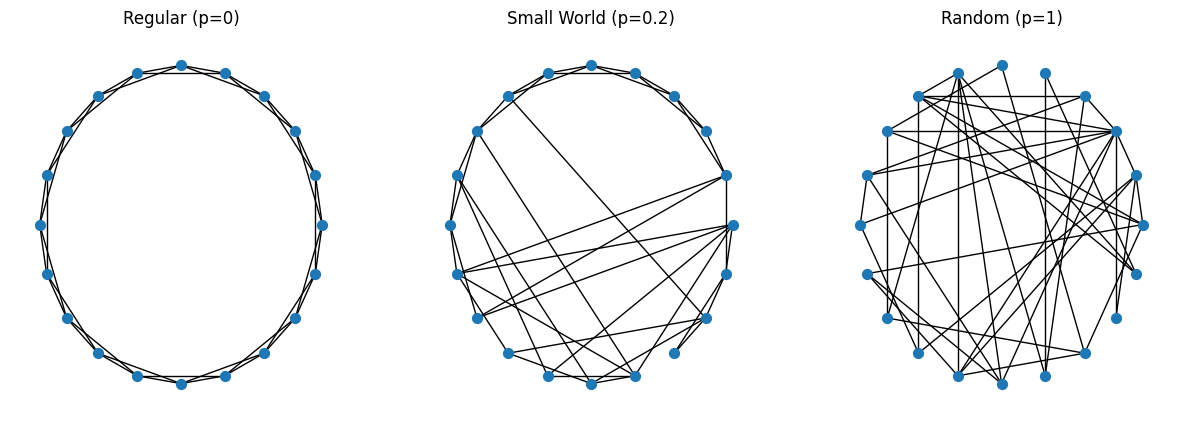

In [5]:
# Visualize Graphs for extreme cases
plt.figure(figsize=(15, 5))

# Regular
plt.subplot(1, 3, 1)
G_reg = nx.watts_strogatz_graph(20, 4, 0)
nx.draw_circular(G_reg, node_size=50)
plt.title("Regular (p=0)")

# Small World
plt.subplot(1, 3, 2)
G_sw = nx.watts_strogatz_graph(20, 4, 0.2)
nx.draw_circular(G_sw, node_size=50)
plt.title("Small World (p=0.2)")

# Random
plt.subplot(1, 3, 3)
G_rand = nx.watts_strogatz_graph(20, 4, 1.0)
nx.draw_circular(G_rand, node_size=50)
plt.title("Random (p=1)")

plt.show()


**Observation and Conclusion**:
1. **Small-World Effect**: At small $p$ (e.g., around 0.01-0.1), the Path Length $L(p)$ drops rapidly (shortcuts are created), while Clustering $C(p)$ remains high (local structure is preserved). This region is the "Small World".
2. **Randomness**: As $p \to 1$, the network becomes random, with low clustering and low path length.
